In [59]:
nifty50_tickers = [
    "ADANIENT.NS","ADANIPORTS.NS","APOLLOHOSP.NS","ASIANPAINT.NS","AXISBANK.NS",
    "BAJAJ-AUTO.NS","BAJFINANCE.NS","BAJAJFINSV.NS","BHARTIARTL.NS","BPCL.NS",
    "BRITANNIA.NS","CIPLA.NS","COALINDIA.NS","DIVISLAB.NS","DRREDDY.NS",
    "EICHERMOT.NS","GRASIM.NS","HCLTECH.NS","HDFCBANK.NS","HDFCLIFE.NS",
    "HEROMOTOCO.NS","HINDALCO.NS","HINDUNILVR.NS","ICICIBANK.NS","INDUSINDBK.NS",
    "INFY.NS","ITC.NS","JSWSTEEL.NS","KOTAKBANK.NS","LT.NS",
    "M&M.NS","MARUTI.NS","NESTLEIND.NS","NTPC.NS","ONGC.NS",
    "POWERGRID.NS","RELIANCE.NS","SBILIFE.NS","SBIN.NS","SUNPHARMA.NS",
    "TATACONSUM.NS","TATAMOTORS.NS","TATASTEEL.NS","TCS.NS","TECHM.NS",
    "TITAN.NS","ULTRACEMCO.NS","UPL.NS","WIPRO.NS"
]


In [60]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [61]:
# Step 1: Download data for last 1 year
data = yf.download(nifty50_tickers, period="5y")['Close']

# Step 2: Compute daily returns
returns = data.pct_change().dropna()

/tmp/ipython-input-948845971.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(nifty50_tickers, period="5y")['Close']
[*********************100%***********************]  49 of 49 completed


In [62]:
data

Ticker,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-14,195.709641,337.906738,1686.960571,1725.407837,434.037720,2612.555908,623.267761,326.746246,507.111481,158.585709,...,503.653687,517.098267,122.775131,36.027725,2084.906982,612.031189,1087.239380,3901.779053,456.034180,130.732788
2020-08-17,197.305634,346.982910,1684.045898,1758.096191,436.328156,2724.533203,625.502747,332.013702,500.204071,156.532593,...,500.810059,523.111023,121.740517,36.591599,2095.368164,634.150085,1106.637695,3926.590332,462.325592,133.309631
2020-08-18,213.165894,346.982910,1676.882446,1793.895508,443.946350,2715.088867,632.881104,335.456665,504.904907,154.383606,...,498.582550,525.035156,123.760483,37.405132,2110.571777,627.114258,1128.005493,4056.338379,469.649933,133.664261
2020-08-19,238.951279,346.206360,1664.877441,1804.999268,442.353027,2675.737305,628.491028,334.480652,514.066650,154.920868,...,498.962524,527.392151,123.317078,37.164078,2098.344238,639.119263,1130.811768,4086.403809,474.404877,132.269440
2020-08-20,233.415161,343.245697,1672.979492,1794.661499,433.141449,2655.755127,627.533264,332.896484,504.185394,158.278671,...,496.018463,528.402283,119.917603,37.241562,2094.857178,638.855530,1108.459351,4032.305664,467.280243,129.645340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-08,2178.100098,1325.000000,7084.500000,2475.600098,1058.099976,8224.000000,1919.199951,877.150024,1858.599976,319.450012,...,1586.900024,1051.000000,633.700012,157.949997,3036.399902,1480.400024,3460.199951,12157.000000,688.750000,239.050003
2025-08-11,2283.399902,1339.400024,7259.000000,2489.100098,1073.300049,8275.000000,1922.800049,877.799988,1857.400024,320.950012,...,1608.400024,1059.099976,653.750000,158.520004,3040.800049,1481.099976,3467.899902,12405.000000,693.700012,241.619995
2025-08-12,2288.199951,1330.500000,7236.500000,2478.300049,1070.000000,8196.500000,1908.000000,853.000000,1850.300049,323.700012,...,1622.199951,1046.800049,654.099976,160.160004,3035.399902,1509.300049,3486.800049,12449.000000,688.650024,241.720001


In [63]:
# Step 3: Features - Mean Return & Volatility
features = pd.DataFrame({
    'MeanReturn': returns.mean(),
    'Volatility': returns.std()
})

In [64]:
# Step 4: Scale features
scaler = StandardScaler()
X = scaler.fit_transform(features)

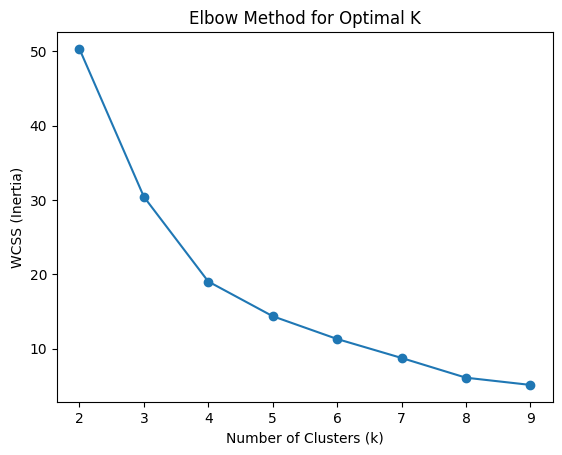

In [65]:
# Step 5: Find optimal K using Elbow Method
wcss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(2,10), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal K")
plt.show()

In [66]:
# Step 6: Apply K-Means with chosen K (say 3 or 4)
kmeans = KMeans(n_clusters=3, random_state=42)
features['Cluster'] = kmeans.fit_predict(X)

print(features.sort_values("Cluster"))

               MeanReturn  Volatility  Cluster
Ticker                                        
ASIANPAINT.NS    0.000416    0.014652        0
AXISBANK.NS      0.000870    0.016919        0
BAJAJ-AUTO.NS    0.001046    0.015587        0
DIVISLAB.NS      0.000730    0.017427        0
CIPLA.NS         0.000715    0.015275        0
BRITANNIA.NS     0.000432    0.012736        0
BPCL.NS          0.000727    0.018178        0
BHARTIARTL.NS    0.001174    0.015421        0
EICHERMOT.NS     0.001029    0.016893        0
DRREDDY.NS       0.000397    0.014370        0
MARUTI.NS        0.000689    0.014882        0
HINDUNILVR.NS    0.000251    0.012730        0
HEROMOTOCO.NS    0.000681    0.016266        0
HDFCLIFE.NS      0.000372    0.015670        0
HDFCBANK.NS      0.000669    0.014022        0
HCLTECH.NS       0.000872    0.015824        0
KOTAKBANK.NS     0.000458    0.015556        0
INFY.NS          0.000548    0.015271        0
ITC.NS           0.000840    0.013179        0
TECHM.NS     

/tmp/ipython-input-2672929381.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  texts.append(plt.text(features['MeanReturn'][i], features['Volatility'][i], txt))


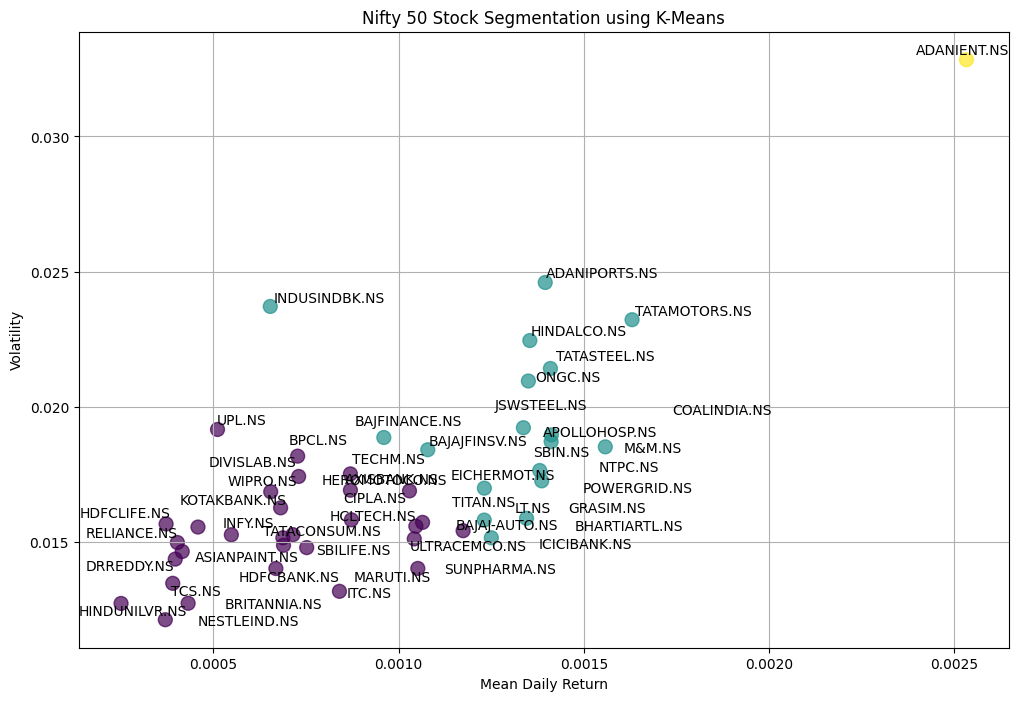

In [67]:
import adjustText

# Step 7: Plot clusters
plt.figure(figsize=(12, 8))
plt.scatter(features['MeanReturn'], features['Volatility'],
            c=features['Cluster'], cmap='viridis', s=100, alpha=0.7)

texts = []
for i, txt in enumerate(features.index):
    texts.append(plt.text(features['MeanReturn'][i], features['Volatility'][i], txt))

adjustText.adjust_text(texts, force_points=(0.2, 0.2), force_text=(0.2, 0.2),
                       expand_points=(1.5, 1.5), expand_text=(1.5, 1.5))

plt.xlabel("Mean Daily Return")
plt.ylabel("Volatility")
plt.title("Nifty 50 Stock Segmentation using K-Means")
plt.grid(True)
plt.show()

In [68]:
# Display stocks in each cluster in a tabular format
for cluster_id in sorted(features['Cluster'].unique()):
    print(f"Cluster {cluster_id}:")
    display(features[features['Cluster'] == cluster_id])

Cluster 0:


,MeanReturn,Volatility,Cluster
Ticker,,,
ASIANPAINT.NS,0.000416,0.014652,0
AXISBANK.NS,0.000870,0.016919,0
BAJAJ-AUTO.NS,0.001046,0.015587,0
BHARTIARTL.NS,0.001174,0.015421,0
BPCL.NS,0.000727,0.018178,0
BRITANNIA.NS,0.000432,0.012736,0
CIPLA.NS,0.000715,0.015275,0
DIVISLAB.NS,0.000730,0.017427,0
DRREDDY.NS,0.000397,0.014370,0


Cluster 1:


,MeanReturn,Volatility,Cluster
Ticker,,,
ADANIPORTS.NS,0.001396,0.024601,1
APOLLOHOSP.NS,0.001412,0.018715,1
BAJAJFINSV.NS,0.001079,0.018415,1
BAJFINANCE.NS,0.000960,0.018867,1
COALINDIA.NS,0.001412,0.018963,1
GRASIM.NS,0.001345,0.015879,1
HINDALCO.NS,0.001354,0.022453,1
ICICIBANK.NS,0.001250,0.015160,1
INDUSINDBK.NS,0.000654,0.023714,1


Cluster 2:


,MeanReturn,Volatility,Cluster
Ticker,,,
ADANIENT.NS,0.002533,0.032838,2


## **Interpretation of Result**

**Cluster 0**: (High Return, High Volatility): Growth stocks

**Cluster 1**: (Low Return, Low Volatility): Defensive stocks

**Cluster 2**: (Moderate Risk/Return): Stable large caps

## **K Means With Feature Engineering (Fundamental Anlysis)**

In [69]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Define tickers
nifty50_tickers = [
    "ADANIENT.NS","ADANIPORTS.NS","APOLLOHOSP.NS","ASIANPAINT.NS","AXISBANK.NS",
    "BAJAJ-AUTO.NS","BAJFINANCE.NS","BAJAJFINSV.NS","BHARTIARTL.NS","BPCL.NS",
    "BRITANNIA.NS","CIPLA.NS","COALINDIA.NS","DIVISLAB.NS","DRREDDY.NS",
    "EICHERMOT.NS","GRASIM.NS","HCLTECH.NS","HDFCBANK.NS","HDFCLIFE.NS",
    "HEROMOTOCO.NS","HINDALCO.NS","HINDUNILVR.NS","ICICIBANK.NS","INDUSINDBK.NS",
    "INFY.NS","ITC.NS","JSWSTEEL.NS","KOTAKBANK.NS","LT.NS",
    "M&M.NS","MARUTI.NS","NESTLEIND.NS","NTPC.NS","ONGC.NS",
    "POWERGRID.NS","RELIANCE.NS","SBILIFE.NS","SBIN.NS","SUNPHARMA.NS",
    "TATACONSUM.NS","TATAMOTORS.NS","TATASTEEL.NS","TCS.NS","TECHM.NS",
    "TITAN.NS","ULTRACEMCO.NS","UPL.NS","WIPRO.NS"
]

# Step 2: Download stock data (1 year)
data = yf.download(nifty50_tickers, period="5y")['Close']

# Step 3: Compute returns
returns = data.pct_change().dropna()

# Step 4: Download Nifty 50 index (^NSEI)
nifty = yf.download("^NSEI", period="5y")['Close']
nifty_returns = nifty.pct_change().dropna()


/tmp/ipython-input-17046482.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(nifty50_tickers, period="5y")['Close']
[*********************100%***********************]  49 of 49 completed
/tmp/ipython-input-17046482.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nifty = yf.download("^NSEI", period="5y")['Close']
[*********************100%***********************]  1 of 1 completed


In [70]:
# Step 5: Create feature dataframe
features = pd.DataFrame({
    'MeanReturn': returns.mean(),
    'Volatility': returns.std()
})

In [72]:
# Step 6: Compute Beta for each stock
betas = {}
for stock in returns.columns:
    # Ensure both series are aligned by index and drop any missing values
    stock_returns = returns[stock].dropna()
    nifty_returns_cleaned = nifty_returns['^NSEI'].dropna() # Ensure nifty_returns is a Series and drop NaNs

    # Find the common index
    common_index = stock_returns.index.intersection(nifty_returns_cleaned.index)

    # Filter both series to keep only the common index
    stock_returns_aligned = stock_returns.loc[common_index]
    nifty_aligned_returns = nifty_returns_cleaned.loc[common_index]


    # Ensure there's enough data after alignment
    if len(stock_returns_aligned) > 1 and len(nifty_aligned_returns) > 1:
        # Calculate covariance and variance manually
        stock_mean = stock_returns_aligned.mean()
        nifty_mean = nifty_aligned_returns.mean()

        cov = ((stock_returns_aligned - stock_mean) * (nifty_aligned_returns - nifty_mean)).mean()
        var = ((nifty_aligned_returns - nifty_mean)**2).mean()


        if var != 0: # Avoid division by zero
            betas[stock] = cov / var
        else:
            betas[stock] = np.nan # Assign NaN if variance is zero
    else:
        betas[stock] = np.nan # Assign NaN if not enough data


features['Beta'] = pd.Series(betas)
features = features.dropna(subset=['Beta']) # Remove stocks where Beta could not be calculated

In [73]:
# Step 7: Add fundamentals
fundamentals = {}
for ticker in nifty50_tickers:
    try:
        info = yf.Ticker(ticker).info
        fundamentals[ticker] = {
            'PE': info.get('trailingPE', np.nan),
            'PB': info.get('priceToBook', np.nan),
            'DividendYield': info.get('dividendYield', np.nan),
            'MarketCap': info.get('marketCap', np.nan)
        }
    except:
        fundamentals[ticker] = {'PE': np.nan, 'PB': np.nan, 'DividendYield': np.nan, 'MarketCap': np.nan}

fund_df = pd.DataFrame(fundamentals).T
# Add suffixes to avoid column overlap issues during join
features = features.join(fund_df, lsuffix='_left', rsuffix='_right')

In [74]:
# Step 8: Clean data (fill missing)
features = features.fillna(features.median())

In [75]:
# Step 9: Scale features
scaler = StandardScaler()
X = scaler.fit_transform(features)

In [88]:
# Step 10: Apply K-Means (choose K=3 for example)
kmeans = KMeans(n_clusters=3, random_state=42)
features['Cluster'] = kmeans.fit_predict(X)

# Step 11: Show results
print(features.sort_values("Cluster"))

               MeanReturn  Volatility      Beta         PE          PB  \
Ticker                                                                   
BHARTIARTL.NS    0.001174    0.015421  0.850104  31.701118    9.517318   
HDFCBANK.NS      0.000669    0.014022  1.061445  22.760553    2.807704   
ICICIBANK.NS     0.001250    0.015160  1.149460  19.420486    3.090940   
SBIN.NS          0.001381    0.017648  1.291443   9.273197    1.415486   
RELIANCE.NS      0.000403    0.014984  1.091130  22.817020    2.203522   
TCS.NS           0.000390    0.013475  0.757693  22.173721   11.169086   
CIPLA.NS         0.000715    0.015275  0.397997  23.405212    4.046696   
ASIANPAINT.NS    0.000416    0.014652  0.669412  67.610910   12.509271   
COALINDIA.NS     0.001412    0.018963  1.001753   7.142061    2.389098   
DIVISLAB.NS      0.000730    0.017427  0.672335  70.429490   10.876602   
DRREDDY.NS       0.000397    0.014370  0.487297  18.380840    2.974626   
EICHERMOT.NS     0.001029    0.016893 

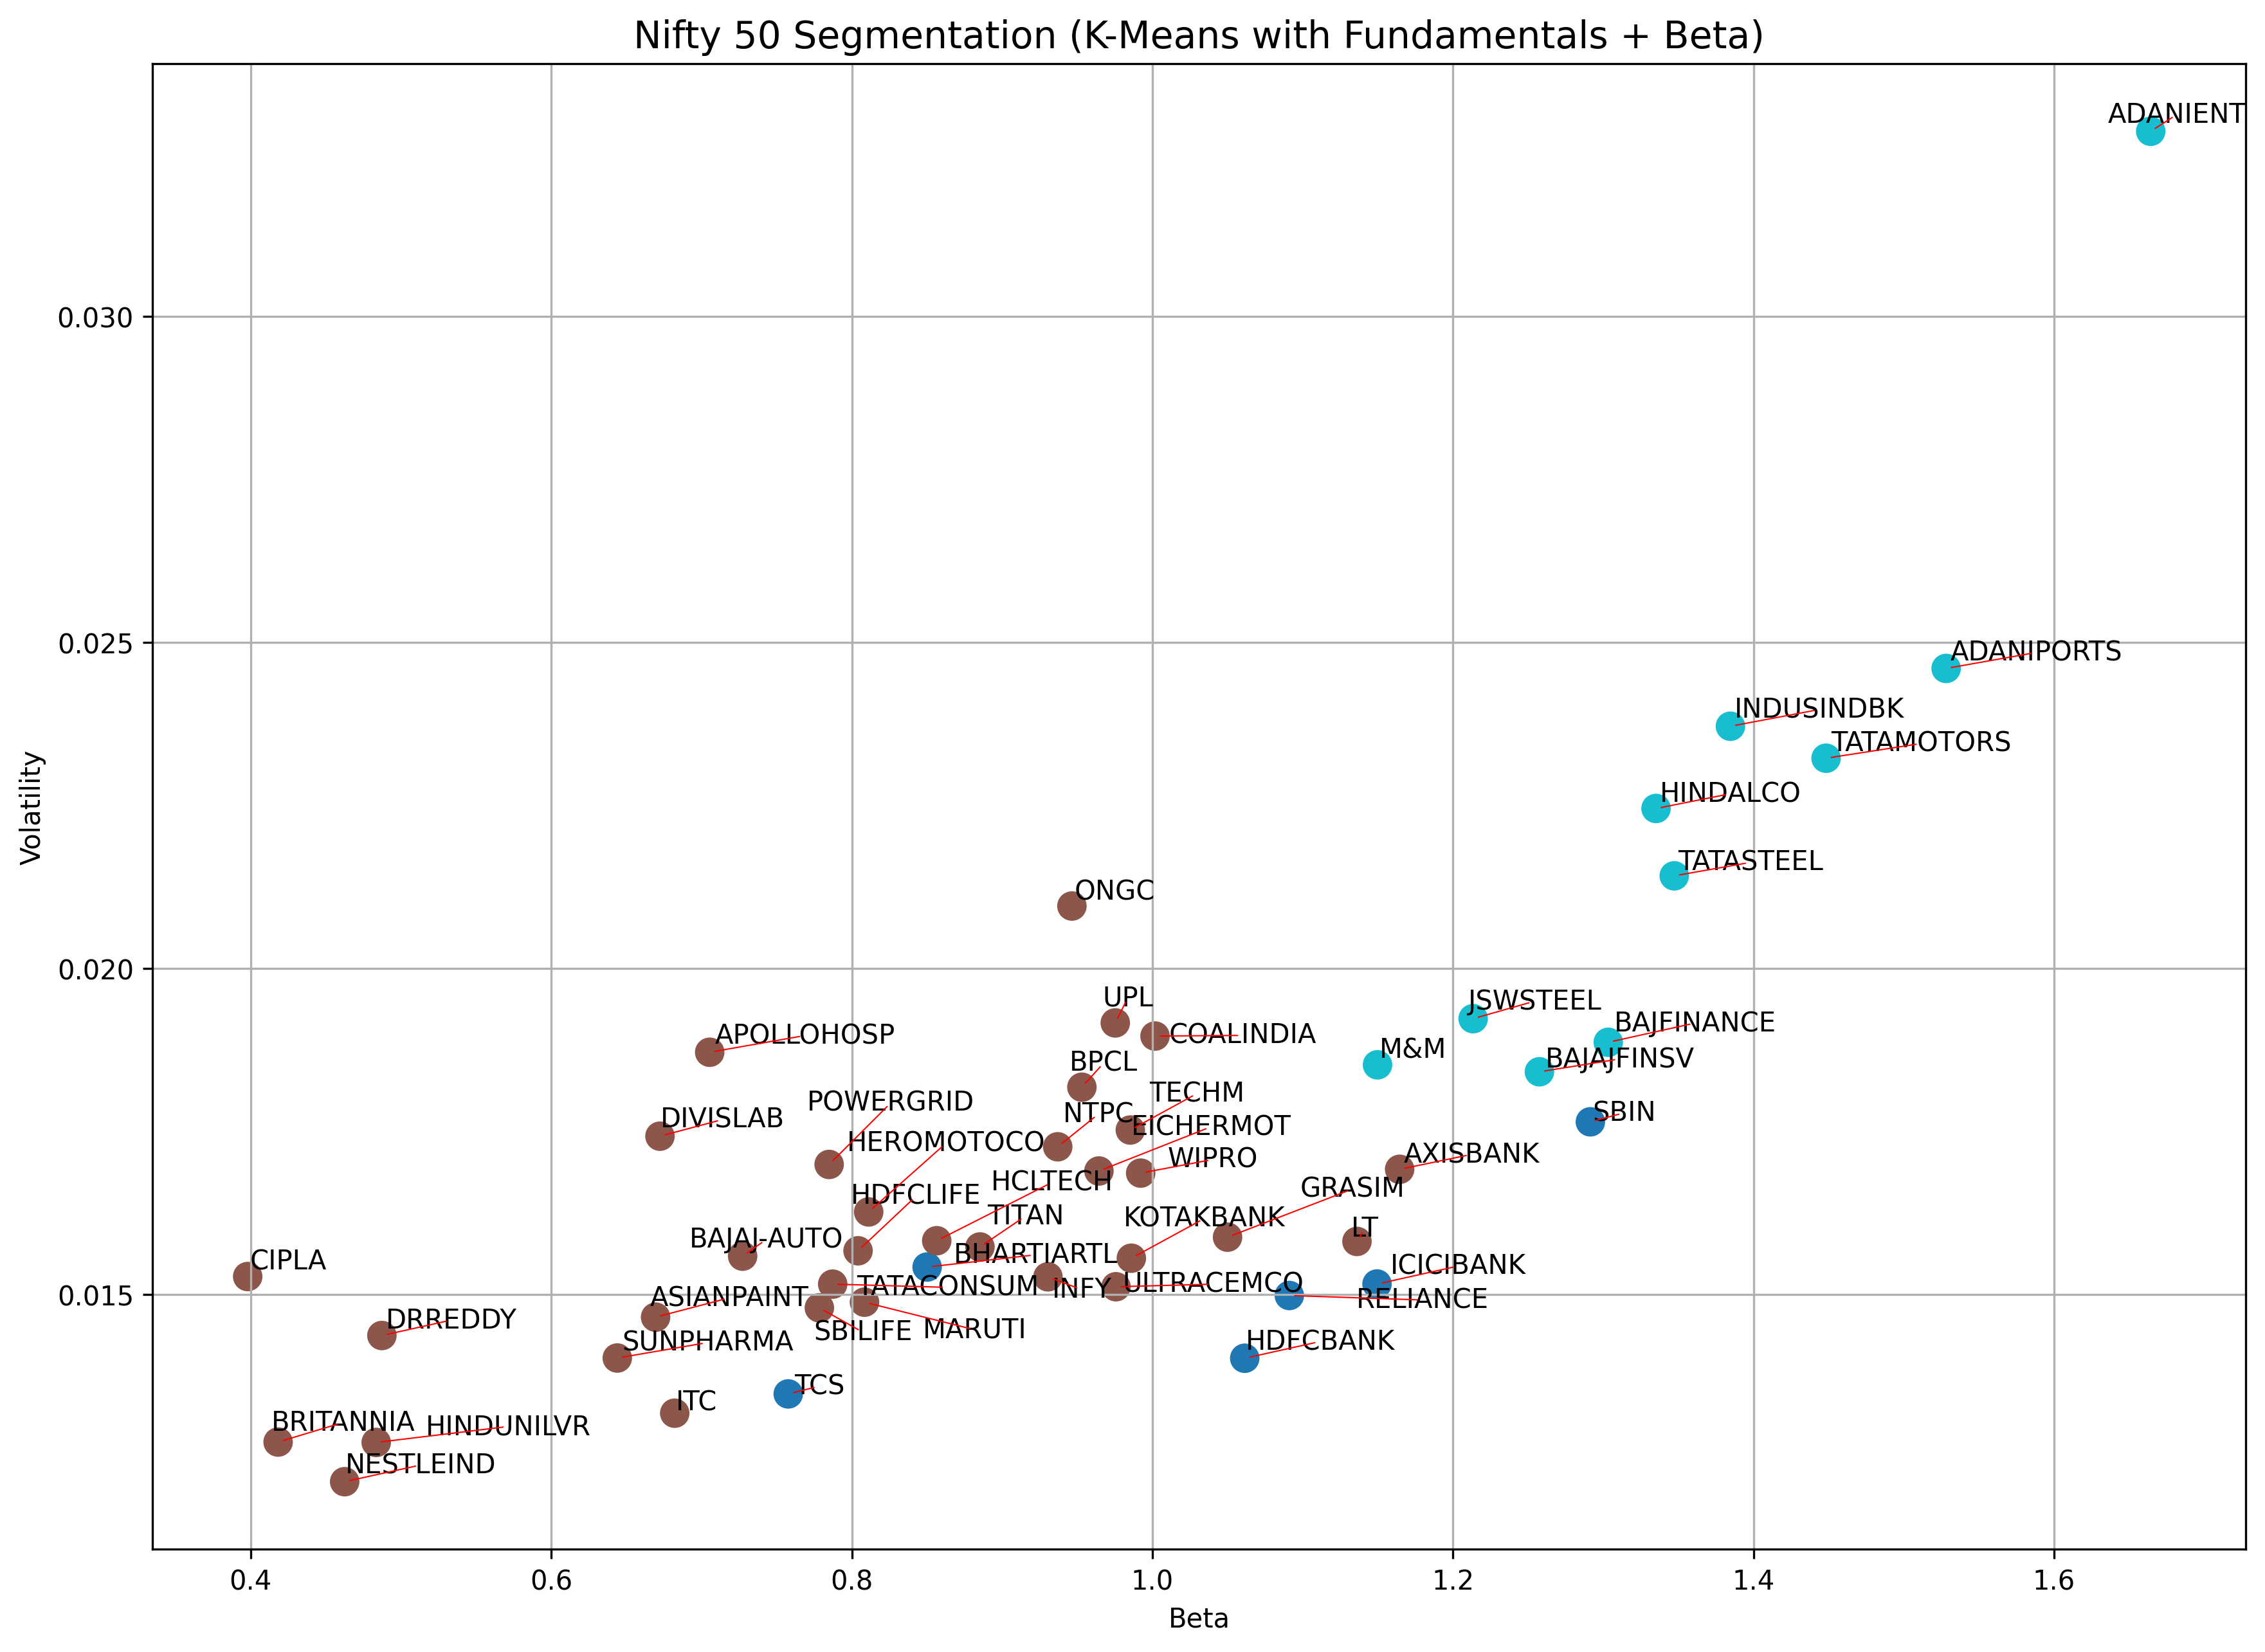

In [93]:
import adjustText

# Step 12: Visualize clustering on 2D (Beta vs Volatility)
plt.figure(figsize=(14, 10), dpi=300) # Increased figure size and DPI for higher resolution
plt.scatter(features['Beta'], features['Volatility'],
            c=features['Cluster'], cmap='tab10', s=100)
texts = []
for i, txt in enumerate(features.index):
    texts.append(plt.annotate(txt.replace(".NS",""), (features['Beta'].iloc[i], features['Volatility'].iloc[i]))) # Using annotate for more control over text placement

adjustText.adjust_text(texts, force_points=(0.3, 0.3), force_text=(0.3, 0.3), # Adjusted forces for better text placement
                       expand_points=(1.8, 1.8), expand_text=(1.8, 1.8),
                       arrowprops=dict(arrowstyle='-', color='red', lw=0.5)) # Added arrows to connect text to points

plt.xlabel("Beta")
plt.ylabel("Volatility")
plt.title("Nifty 50 Segmentation (K-Means with Fundamentals + Beta)", fontsize=14) # Increased title font size
plt.grid(True)
plt.show()

In [91]:
# Display stocks in clusters 1, 2, and 3 in a tabular format
for cluster_id in [0,1, 2,]:
    print(f"Cluster {cluster_id}:")
    display(features[features['Cluster'] == cluster_id])

Cluster 0:


,MeanReturn,Volatility,Beta,PE,PB,DividendYield,MarketCap,Cluster
Ticker,,,,,,,,
BHARTIARTL.NS,0.001174,0.015421,0.850104,31.701118,9.517318,0.85,1.121678e+13,0
HDFCBANK.NS,0.000669,0.014022,1.061445,22.760553,2.807704,1.10,1.526925e+13,0
ICICIBANK.NS,0.001250,0.015160,1.149460,19.420486,3.090940,0.77,1.019196e+13,0
RELIANCE.NS,0.000403,0.014984,1.091130,22.817020,2.203522,0.40,1.857877e+13,0
SBIN.NS,0.001381,0.017648,1.291443,9.273197,1.415486,1.92,7.619876e+12,0
TCS.NS,0.000390,0.013475,0.757693,22.173721,11.169086,2.02,1.093568e+13,0


Cluster 1:


,MeanReturn,Volatility,Beta,PE,PB,DividendYield,MarketCap,Cluster
Ticker,,,,,,,,
APOLLOHOSP.NS,0.001412,0.018715,0.705426,71.429220,13.694229,0.26,1.124614e+12,1
ASIANPAINT.NS,0.000416,0.014652,0.669412,67.610910,12.509271,0.98,2.425693e+12,1
AXISBANK.NS,0.000870,0.016919,1.164520,11.930295,1.706989,0.09,3.313171e+12,1
BAJAJ-AUTO.NS,0.001046,0.015587,0.727336,30.200096,6.515846,2.56,2.292257e+12,1
BPCL.NS,0.000727,0.018178,0.953083,7.846229,1.697355,3.14,1.381381e+12,1
BRITANNIA.NS,0.000432,0.012736,0.418226,58.190792,29.347357,1.41,1.279178e+12,1
CIPLA.NS,0.000715,0.015275,0.397997,23.405212,4.046696,0.83,1.262519e+12,1
COALINDIA.NS,0.001412,0.018963,1.001753,7.142061,2.389098,8.32,2.367105e+12,1
DIVISLAB.NS,0.000730,0.017427,0.672335,70.429490,10.876602,0.49,1.628121e+12,1


Cluster 2:


,MeanReturn,Volatility,Beta,PE,PB,DividendYield,MarketCap,Cluster
Ticker,,,,,,,,
ADANIENT.NS,0.002533,0.032838,1.664288,41.990795,5.518245,0.06,2.632170e+12,2
ADANIPORTS.NS,0.001396,0.024601,1.528170,24.897648,4.514627,0.54,2.811740e+12,2
BAJAJFINSV.NS,0.001079,0.018415,1.257540,32.602276,4.234099,0.05,3.065758e+12,2
BAJFINANCE.NS,0.000960,0.018867,1.303356,30.698006,5.534440,0.51,5.357252e+12,2
HINDALCO.NS,0.001354,0.022453,1.335140,9.138316,1.248708,0.72,1.544969e+12,2
INDUSINDBK.NS,0.000654,0.023714,1.384637,59.532093,0.924719,1.92,5.996937e+11,2
JSWSTEEL.NS,0.001337,0.019229,1.213434,52.935223,3.211160,0.27,2.551843e+12,2
M&M.NS,0.001558,0.018522,1.149798,26.733809,4.731068,0.77,3.917053e+12,2
TATAMOTORS.NS,0.001630,0.023224,1.448276,10.895964,2.104642,0.90,2.444656e+12,2


In [92]:
cluster_summary = features.groupby("Cluster")[["MeanReturn","Volatility","Beta","PE","PB","DividendYield"]].mean()
print(cluster_summary)


         MeanReturn  Volatility      Beta         PE         PB  DividendYield
Cluster                                                                       
0          0.000878    0.015118  1.033546  21.357682   5.034009       1.176667
1          0.000832    0.015955  0.814081  39.288384  39.343349       1.988182
2          0.001391    0.022328  1.363189  33.231118   3.415338       0.806000


## **PCA + K-Means**

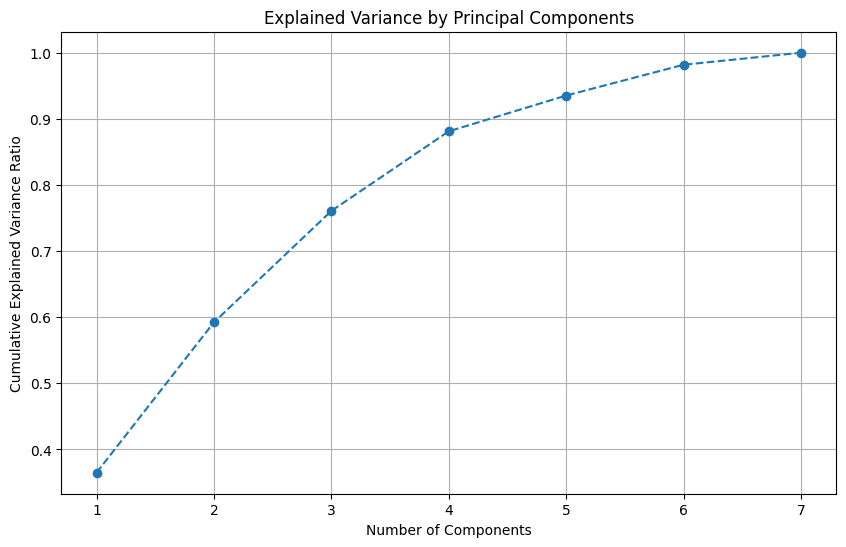

In [95]:
from sklearn.decomposition import PCA

# Step 10 (Revised): Apply PCA to the scaled features
pca = PCA()
X_pca = pca.fit_transform(X)

# Explained variance ratio by each component
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

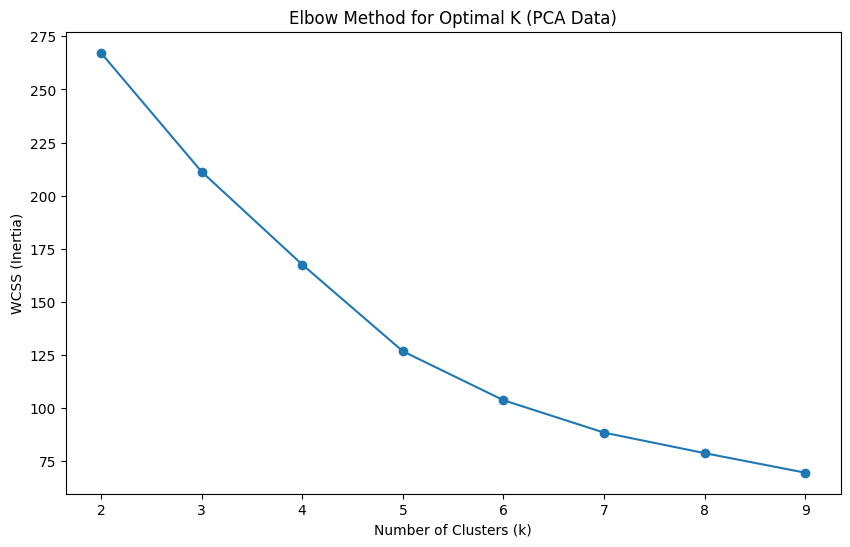

In [97]:
# Find optimal K using Elbow Method on PCA-transformed data
wcss_pca = []
for k in range(2, 10):
    kmeans_pca = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init for KMeans
    kmeans_pca.fit(X_pca)
    wcss_pca.append(kmeans_pca.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), wcss_pca, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal K (PCA Data)")
plt.show()

In [98]:
# Step 11 (Revised): Apply K-Means with chosen K (e.g., based on Elbow Method)
# Let's choose K=3 for now, based on the previous analysis, but you can change this
chosen_k = 3
kmeans_pca = KMeans(n_clusters=chosen_k, random_state=42, n_init=10)
features['Cluster_PCA'] = kmeans_pca.fit_predict(X_pca)

# Display the cluster assignments
print("Cluster assignments after PCA + K-Means:")
print(features['Cluster_PCA'])

Cluster assignments after PCA + K-Means:
Ticker
ADANIENT.NS      1
ADANIPORTS.NS    1
APOLLOHOSP.NS    0
ASIANPAINT.NS    0
AXISBANK.NS      1
BAJAJ-AUTO.NS    0
BAJAJFINSV.NS    1
BAJFINANCE.NS    1
BHARTIARTL.NS    0
BPCL.NS          1
BRITANNIA.NS     0
CIPLA.NS         0
COALINDIA.NS     1
DIVISLAB.NS      0
DRREDDY.NS       0
EICHERMOT.NS     1
GRASIM.NS        1
HCLTECH.NS       2
HDFCBANK.NS      0
HDFCLIFE.NS      0
HEROMOTOCO.NS    0
HINDALCO.NS      1
HINDUNILVR.NS    0
ICICIBANK.NS     1
INDUSINDBK.NS    1
INFY.NS          2
ITC.NS           0
JSWSTEEL.NS      1
KOTAKBANK.NS     0
LT.NS            1
M&M.NS           1
MARUTI.NS        0
NESTLEIND.NS     0
NTPC.NS          1
ONGC.NS          1
POWERGRID.NS     1
RELIANCE.NS      0
SBILIFE.NS       0
SBIN.NS          1
SUNPHARMA.NS     0
TATACONSUM.NS    0
TATAMOTORS.NS    1
TATASTEEL.NS     1
TCS.NS           0
TECHM.NS         1
TITAN.NS         0
ULTRACEMCO.NS    0
UPL.NS           0
WIPRO.NS         1
Name: Cluster_PCA, dt

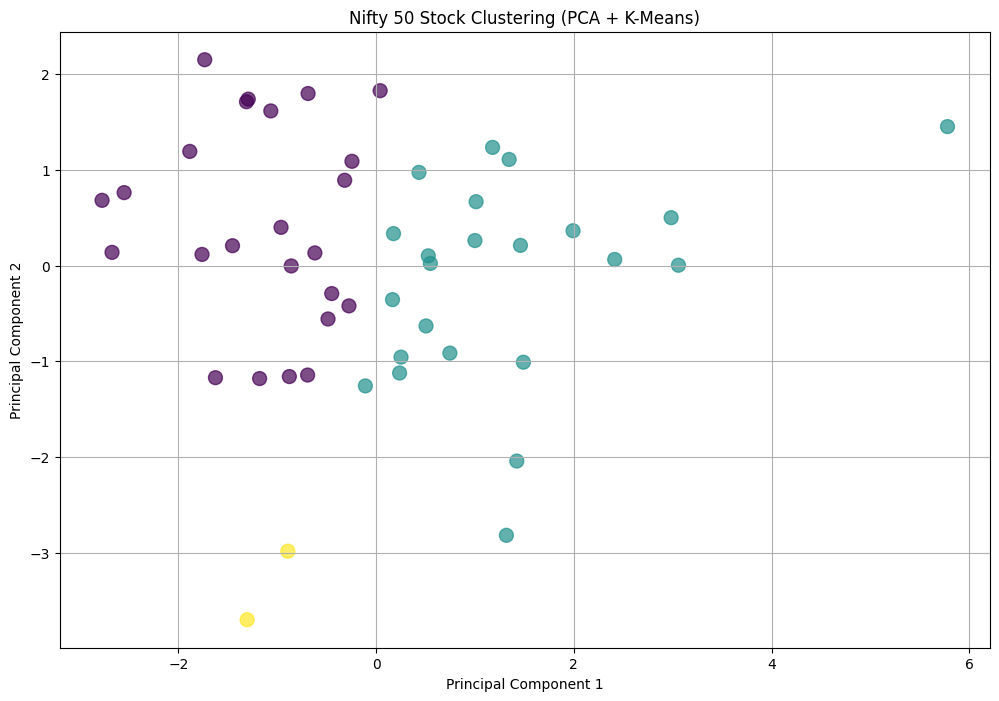

In [99]:
# Visualize PCA clusters
plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=features['Cluster_PCA'], cmap='viridis', s=100, alpha=0.7)

# Optional: Add stock tickers as labels (can be crowded)
# texts = []
# for i, txt in enumerate(features.index):
#     texts.append(plt.text(X_pca[i, 0], X_pca[i, 1], txt))
# adjustText.adjust_text(texts) # You might need to install adjustText: %pip install adjustText

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Nifty 50 Stock Clustering (PCA + K-Means)")
plt.grid(True)
plt.show()